In [1]:
# import dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Load dataset
df = pd.read_csv('data/Language_Detection.csv')
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [3]:
# check the counts of the different languages
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
# seperate features
text = df['Text']
language = df['Language']

In [5]:
sentence_list = []

for x in text:
    te = []
    # remove the symbols and numbers
    x = re.sub(r'[!@#$(),"%^*?:;~`0-9.]', '', x)
    te = re.sub(r'[\\]', '', x)
    x = re.sub(r'[[]]', '', x)
    
    # convert the text to lower case
    x = x.lower()
    
    sentence_list.append(x)

sentence_list

C:\Users\mthal\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Possible nested set at position 1
  


[' nature in the broadest sense is the natural physical material world or universe',
 'nature can refer to the phenomena of the physical world and also to life in general',
 'the study of nature is a large if not the only part of science',
 'although humans are part of nature human activity is often understood as a separate category from other natural phenomena',
 ' the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth',
 ' in ancient philosophy natura is mostly used as the latin translation of the greek word physis φύσις which originally related to the intrinsic characteristics that plants animals and other features of the world develop of their own accord',
 ' \nthe concept of nature as a whole the physical universe is one of several expansions of the original notion it began with certain core applications of the word φύσις by pre-socratic philosophers thoug

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(language)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(sentence_list).toarray()
X.shape 

(10337, 39440)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9777562862669246


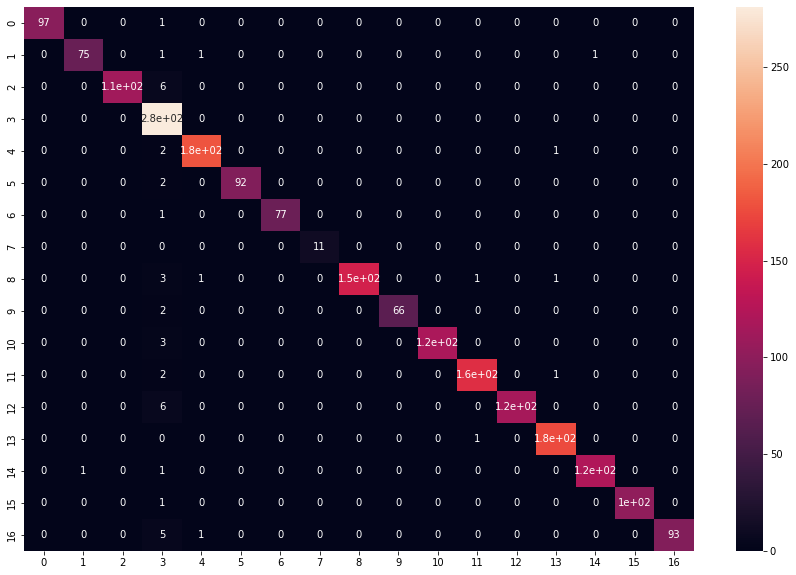

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [13]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [14]:
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [15]:
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The langauge is in French


In [16]:
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [17]:
predict("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The langauge is in Spanish


In [18]:
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")


The langauge is in Malayalam


In [19]:
predict("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")


The langauge is in Russian


In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                394410    
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 394,531
Trainable params: 394,531
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(x_train, y_train, epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: -38.2377 - accuracy: 0.0455
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: -700.5140 - accuracy: 0.0686
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: -3066.7295 - accuracy: 0.0743
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: -8031.4873 - accuracy: 0.0752
Epoch 5/100
257/259 [============================>.] - ETA: 0s - loss: -16242.8369 - accuracy: 0.0759
Epoch 00005: saving model to checkpoints\weights.05.hdf5
259/259 [==============================] - 1s 5ms/step - loss: -16280.8389 - accuracy: 0.0758
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: -28307.0938 - accuracy: 0.0755
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: -44512.2461 - accuracy: 0.0769
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: -65232.7812 - accuracy: 0.0763
Epoch 9/100


254/259 [============================>.] - ETA: 0s - loss: -11506270.0000 - accuracy: 0.0778
Epoch 00060: saving model to checkpoints\weights.60.hdf5
259/259 [==============================] - 2s 7ms/step - loss: -11507951.0000 - accuracy: 0.0780
Epoch 61/100
259/259 [==============================] - 2s 6ms/step - loss: -12003568.0000 - accuracy: 0.0773
Epoch 62/100
259/259 [==============================] - 2s 6ms/step - loss: -12512597.0000 - accuracy: 0.0775
Epoch 63/100
259/259 [==============================] - 2s 6ms/step - loss: -13034570.0000 - accuracy: 0.0779
Epoch 64/100
259/259 [==============================] - 2s 6ms/step - loss: -13570369.0000 - accuracy: 0.0779
Epoch 65/100
258/259 [============================>.] - ETA: 0s - loss: -14121932.0000 - accuracy: 0.0776
Epoch 00065: saving model to checkpoints\weights.65.hdf5
259/259 [==============================] - 1s 5ms/step - loss: -14119530.0000 - accuracy: 0.0776
Epoch 66/100
259/259 [==============================]

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

65/65 - 0s - loss: -4.2729e+07 - accuracy: 0.0629 - 211ms/epoch - 3ms/step
Loss: -42729240.0, Accuracy: 0.06286267191171646


In [23]:
# Define the model - deep neural net
number_input_features = len(x_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 315528    
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 315,579
Trainable params: 315,579
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(x_train,y_train,epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: -37.8228 - accuracy: 0.0428
Epoch 2/100
259/259 [==============================] - 1s 6ms/step - loss: -406.7636 - accuracy: 0.0536
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: -1680.8636 - accuracy: 0.0703
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: -4311.6104 - accuracy: 0.0732
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: -8623.3564 - accuracy: 0.0729
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: -14865.9443 - accuracy: 0.0738
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: -23243.3164 - accuracy: 0.0741
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: -33887.6445 - accuracy: 0.0745
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: -46936.6133 - accuracy: 0.0744
Epoch 10/100
259/259 [==============================] 

259/259 [==============================] - 1s 4ms/step - loss: -10597421.0000 - accuracy: 0.0749
Epoch 77/100
259/259 [==============================] - 1s 4ms/step - loss: -10961627.0000 - accuracy: 0.0766
Epoch 78/100
259/259 [==============================] - 1s 4ms/step - loss: -11333228.0000 - accuracy: 0.0753
Epoch 79/100
259/259 [==============================] - 1s 4ms/step - loss: -11713386.0000 - accuracy: 0.0755
Epoch 80/100
259/259 [==============================] - 1s 4ms/step - loss: -12100905.0000 - accuracy: 0.0752
Epoch 81/100
259/259 [==============================] - 1s 4ms/step - loss: -12496611.0000 - accuracy: 0.0763
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: -12900593.0000 - accuracy: 0.0745
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: -13311997.0000 - accuracy: 0.0768
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: -13732308.0000 - accuracy: 0.0751
Epoch 85/100
259/259 [=

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

65/65 - 0s - loss: -2.1430e+07 - accuracy: 0.0600 - 204ms/epoch - 3ms/step
Loss: -21429538.0, Accuracy: 0.059961315244436264
